# APS1070
#### Project 1 --- Basic Principles and Models 
**Deadline: Jun 4, 11PM - 10 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: Jashwant Raj Gunaseelan

Student ID: 1007923712

##**Marking Scheme:**

This project is worth **10 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings. 

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).




### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858 



# Project 1 [10 Marks] 
Let's apply the tools we have learned in Tutorial 1 to a new dataset.

We're going to work with a breast cancer dataset. Download it using the cell below:

In [10]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer() # loading the dataset

In [11]:
dataset

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

## Part 1: Getting started [2 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.4]**
* How many features do we have in this dataset? ___
* How many observations have a 'mean area' of greater than 700? ___
* How many participants tested `Malignant`? ___
* How many participants tested `Benign`? ___

In [12]:
data=dataset.data
target=dataset.target
feature_names=dataset.feature_names
print(data,data.shape)  
print(target, target.shape)
print(feature_names, feature_names.shape)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]] (569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 

In [13]:
import pandas as pd

In [14]:
df=pd.DataFrame(data=data,columns=feature_names) # Converting it into pandas representation

In [15]:
df['Target']=target # Adding an extra column called target

In [16]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [17]:
print("The number of features in the dataset are ",feature_names.shape)
df[df['mean area']>700]        #Filtering all the data that has mean area greater than 700

The number of features in the dataset are  (30,)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
4,20.29,14.34,135.1,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
6,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.09,143.0,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873,0
564,21.56,22.39,142.0,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.2,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.3,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.7,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820,0


In [18]:
print("The number of patients that tested Malignant are",len([x for x in target if x == dataset.target_names.tolist().index('benign')]))
df[df['Target']==1]            #Filtering data that has target equal to 1 (benign)

The number of patients that tested Malignant are 357


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,0.06147,...,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004,1
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732,1
560,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321,1
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,1


### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.) 

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

In [19]:
from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_Train,Y_Test=train_test_split(df.values[:,0:-1],df.values[:,-1],test_size=0.3,random_state=0) # Here we split the dataset into 2 sets, a test set and a train set

In [20]:
print(X_Train.shape,Y_Train.shape)
print(X_Test.shape,Y_Test.shape)

(398, 30) (398,)
(171, 30) (171,)


In [21]:
df_X_Train=pd.DataFrame(data=X_Train,columns=feature_names) #We create a new pandas dataframe with standardized values only for X_Train.

In [22]:
print("The number of patients that tested Malignant are",len([x for x in target if x == dataset.target_names.tolist().index('malignant')]))
df[df['Target']==0]         #Filtering data that has target equal to 0 (malignent)

The number of patients that tested Malignant are 212


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873,0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820,0


### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is ``worst smoothness``, the y-axis is ``worst fractal dimension,`` and the color of each datapoint indicates its class.  **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again. What's different? Based on your observation, what is the advantage of standardization? **[0.6]**




This is the graph for the input data without standardization


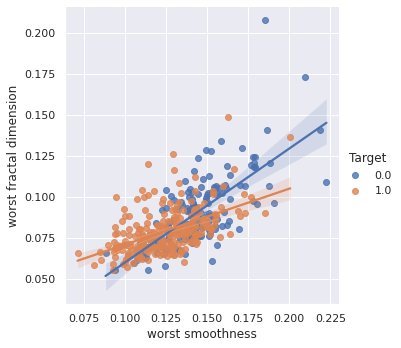

In [23]:
import seaborn as sp
from sklearn.preprocessing import StandardScaler

sp.set_theme()
print("This is the graph for the input data without standardization")
df_X_Train['Target']=Y_Train
UNSTD=sp.lmplot(x="worst smoothness",y="worst fractal dimension",data=df_X_Train,hue='Target') 
# Plotting the data for X_train, that is unstandardised. By appending the Target row we can observe the different datapoint and where it belongs

In [24]:
Scaler=StandardScaler()
Scaler.fit(X_Train)# We standardize the X_Train set here.

#Printing the Mean and the var
print("Mean of all the features in X_Train ",Scaler.mean_)
print("Variance of all the features in X_Train",Scaler.var_)

X_Train_Scaled=Scaler.transform(X_Train)
X_Test_Scaled=Scaler.transform(X_Test)

df_standardized=pd.DataFrame(data=X_Train_Scaled,columns=feature_names) #We create a new pandas dataframe with standardized values only for X_Train. 
#So it must be lesser than the overall pandas data frame

Mean of all the features in X_Train  [1.41855000e+01 1.91928392e+01 9.23355025e+01 6.61859045e+02
 9.64749497e-02 1.04080000e-01 8.87943058e-02 4.94785528e-02
 1.80698241e-01 6.26464573e-02 4.09096231e-01 1.20445829e+00
 2.86661859e+00 4.13843643e+01 6.98354020e-03 2.50993719e-02
 3.12257678e-02 1.16784749e-02 2.04023819e-02 3.73508116e-03
 1.63596206e+01 2.55345226e+01 1.07736030e+02 8.94246985e+02
 1.32529045e-01 2.53368894e-01 2.68530796e-01 1.15221410e-01
 2.89186935e-01 8.37181407e-02]
Variance of all the features in X_Train [1.29175157e+01 1.75159661e+01 6.11978383e+02 1.34027359e+05
 1.93172478e-04 2.59765595e-03 6.09266864e-03 1.53406406e-03
 7.85206454e-04 4.69575214e-05 8.61981370e-02 3.03909148e-01
 4.44058298e+00 2.47685722e+03 8.16640844e-06 2.82690187e-04
 8.14560621e-04 3.42804953e-05 6.67639347e-05 6.93955438e-06
 2.45909719e+01 3.76963891e+01 1.18455243e+03 3.56531201e+05
 5.27186175e-04 2.35498499e-02 3.72515370e-02 4.30408790e-03
 4.01445370e-03 3.21651393e-04]


Now we can plot the graph for the standarized outputs


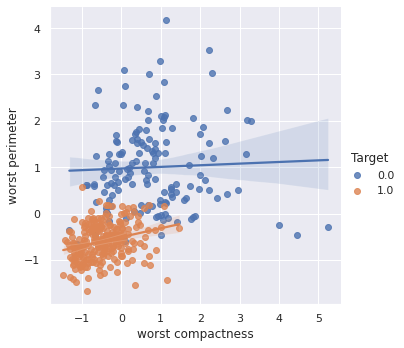

In [25]:
print("Now we can plot the graph for the standarized outputs")
df_standardized['Target']=Y_Train
STD=sp.lmplot(x="worst compactness",y="worst perimeter",data=df_standardized,hue='Target')
#Plotting the data for X_train, that is standardised. By appending the Target row we can observe the different datapoint and where it belongs

As we can see the graph for standarized output is easier to differentiate and by standarization we can get a neutral ground to train our model more efficiently .

## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**
3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). **[0.5]**




In [26]:
from sklearn import neighbors
import numpy as np

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

In [28]:
cross_validation_accuracy=[]
cross_validation_train_accuracy=[]
for x in range(1,101):
  knn = neighbors.KNeighborsClassifier(n_neighbors=x) # selecting the K value from 1-100 and checking the mean accuracy for every value
  score=cross_validate(knn,X_Train,Y_Train,cv=5,return_train_score=True)  #We perform cross validation ,where the train data is split into 5 and 1 of the 5 splits is used for validation (Happens 5 times)
  cross_validation_accuracy.append(score['test_score'].mean())
  cross_validation_train_accuracy.append(score['train_score'].mean())

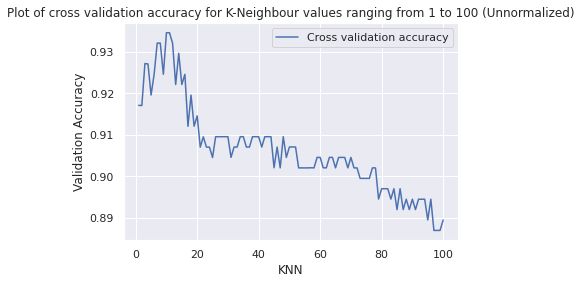

In [33]:
import matplotlib.pyplot as plt
plt.plot(list(range(1,101)),cross_validation_accuracy,label="Cross validation accuracy")
plt.legend()
plt.xlabel("KNN")
plt.ylabel("Validation Accuracy")
plt.title("Plot of cross validation accuracy for K-Neighbour values ranging from 1 to 100 (Unnormalized)");
plt.show()

According to the graph therer are 2 Knn values that provide the same validation accuracy

In [ ]:
Knn_max_values=[]
Knn_min_values=[]
for index,value in enumerate(cross_validation_accuracy):
  if(value == max(cross_validation_accuracy)):
    Knn_max_values.append(index+1)
  elif(value == min(cross_validation_accuracy)):
    Knn_min_values.append(index+1)
print("The Knn values that have the highest cross validation accuracy are",Knn_max_values)
print("The Knn values that have the lowest cross validation accuracy are",Knn_min_values)

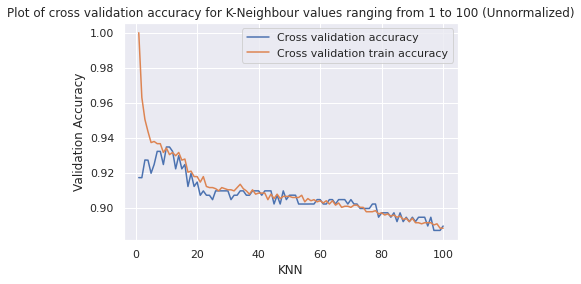

In [35]:
plt.plot(list(range(1,101)),cross_validation_accuracy,label="Cross validation accuracy")
plt.plot(list(range(1,101)),cross_validation_train_accuracy,label="Cross validation train accuracy")
plt.legend()
plt.xlabel("KNN")
plt.ylabel("Validation Accuracy")
plt.title("Plot of cross validation accuracy for K-Neighbour values ranging from 1 to 100 (Unnormalized)");
plt.show()

## ***As we can obeserve from the graph that is plotted between KNN value and Validation Accuracy, the blue graph is a plot of cross validation train accuracy for all values of K from 1 to 100 and the the red graph is a plot of the of cross validation test accuracy.***
## ***The cross validation test accuracy 93.465% is highest when K value is equal to 10 and 11, this part of the graph shows us that the model works better. The part of the graph before 10 is where we observe Overfitting and the part of the graph after 11 is where we can observe underfitting***

## Part 3: Feature Selection [3 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy. 
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!. 

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use [this link](https://machinelearningmastery.com/calculate-feature-importance-with-python/
) to get familiar with extracting the feature impotance order of machine learning algorithms in Python.

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to repeat the process and remove another feature.


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[1]**
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Removes the least important feature based on step 2. 
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score, the corresponding `k` (number of neighbours) value, and the removed feature in three lists.
6. Repeat Steps 3-5 until you meet the stop condition (step 7). 
 
7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, the list of corresponding mean cross-validation accuracies, and the list of `k` values when a feature was removed (i.e., the lists that were appended to in Step 5).

* Visualize your results by plotting the best mean cross-validation accuracy (based on the best value of `k`) on y axis vs. the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

* State what is the number of essential features for classification and justify your answer. **[1]**
  
  







 

You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order. 
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


In [36]:
from sklearn import tree
from matplotlib import pyplot as plt
def Feature_selector (X_train,y_train,tr=0.95):   # The feature selector is used to remove the feature has less impact in training and also while perdicting the test data
  if X_train.shape[1] <= 1:                          # When there is only 1 feature left we prefer not to remove it
      return ('Nan', 'Nan')
  dt = tree.DecisionTreeClassifier()
  dt.fit(X_train,y_train)
  importance = dt.feature_importances_      # Gives us the importance values for features
  del_index=np.argmin(importance)           # Provides the index of the least important feature
  New_df_Train=pd.DataFrame(data=X_train,columns=feature_names)
  return (New_df_Train.drop(columns=feature_names[del_index]),feature_names[del_index])

In [37]:
from matplotlib import pyplot as plt
Deleted_feature,max_cv_acc,K_Value=[],[],[]
feature_names=dataset.feature_names

#Initially we do our training on our nonstandardised data. We remove feature by feature and check for 1-100 KNN values and find the best K value and best accuracy
X_Train_FS,removed_feature=Feature_selector(X_Train,Y_Train)                              
Deleted_feature.append(removed_feature)
for ind,val in enumerate(feature_names):
  if(val==removed_feature):
    feature_names=np.delete(feature_names,ind)
X_Train_FS=X_Train_FS.values
cross_validation_accuracy_FS=[]
for x in range(1,101):
  knn = neighbors.KNeighborsClassifier(n_neighbors=x)
  score=cross_validate(knn,X_Train_FS,Y_Train,cv=5,return_train_score=True)
  cross_validation_accuracy_FS.append(score['test_score'].mean())
max_cv_acc.append(max(cross_validation_accuracy_FS))
K_Value.append(cross_validation_accuracy_FS.index(max(cross_validation_accuracy_FS))+1)

while (X_Train_FS is not 'Nan'):
  if ((X_Train_FS.shape[1]>1) or (K_Value[-1]>(0.95*max(cross_validation_accuracy)))):
    X_Train_FS,removed_feature=Feature_selector(X_Train_FS,Y_Train)
    if(X_Train_FS is not 'Nan'):
      Deleted_feature.append(removed_feature)
      for ind,val in enumerate(feature_names):
        if(val==removed_feature):
          feature_names=np.delete(feature_names,ind)
      X_Train_FS=X_Train_FS.values
      cross_validation_accuracy_FS=[]
      for x in range(1,101):
        knn = neighbors.KNeighborsClassifier(n_neighbors=x)
        score=cross_validate(knn,X_Train_FS,Y_Train,cv=5,return_train_score=True)
        cross_validation_accuracy_FS.append(score['test_score'].mean())
      max_cv_acc.append(max(cross_validation_accuracy_FS))
      K_Value.append(cross_validation_accuracy_FS.index(max(cross_validation_accuracy_FS))+1)
    

print(Deleted_feature,max_cv_acc,K_Value)

['mean radius', 'mean texture', 'mean area', 'mean smoothness', 'mean perimeter', 'mean compactness', 'mean concave points', 'mean concavity', 'mean fractal dimension', 'texture error', 'perimeter error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'worst perimeter', 'worst radius', 'worst compactness', 'worst smoothness', 'worst fractal dimension', 'fractal dimension error', 'radius error', 'mean symmetry', 'worst texture', 'worst concavity', 'worst symmetry', 'area error', 'worst area'] [0.9346518987341772, 0.9346518987341772, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145569620253164, 0.9145569620253164, 0.9145569620253164, 0.9145569620253164, 0.9145569620253164, 0.9145569620253164, 0.91455

In [48]:
feature_names=dataset.feature_names
Highest_Score = tree.DecisionTreeClassifier()
Highest_Score.fit(X_Train,Y_Train)
importance = Highest_Score.feature_importances_
importance=importance.tolist()
print("The feature with the highest score is",dataset.feature_names[importance.index(max(importance))])

The feature with the highest score is worst concave points


In [49]:
for x in dataset.feature_names:
  if(x not in Deleted_feature):
    print("The feature that wasn't deleted is",x)

The feature that wasn't deleted is worst concave points


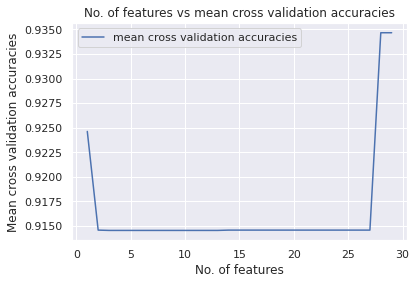

In [50]:
Feature_del=list(range(1,len(dataset.feature_names)))
Feature_del.reverse()
plt.plot(Feature_del,max_cv_acc,label="mean cross validation accuracies")
plt.legend()
plt.xlabel("No. of features")
plt.ylabel("Mean cross validation accuracies")
plt.title("No. of features vs mean cross validation accuracies");
plt.show()

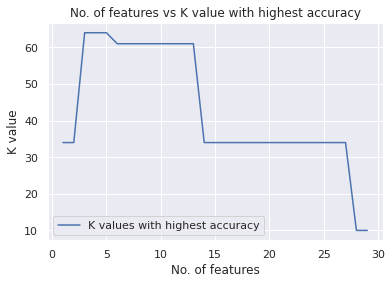

In [51]:
plt.plot(Feature_del,K_Value,label="K values with highest accuracy")
plt.legend()
plt.xlabel("No. of features")
plt.ylabel("K value")
plt.title("No. of features vs K value with highest accuracy");
plt.show()

In [52]:
f=[30-(ind+1) for ind,acc in enumerate(max_cv_acc) if (acc == max(max_cv_acc))]
print(f"Hence the minimum number of features required for a highly accurate model is between {min(f)-1} and 30.")
print("As shown in the first graph of part 3 we see that the accuracy is similar to cross validation accuracy when we have all the features.")

Hence the minimum number of features required for a highly accurate model is between 27 and 30.
As shown in the first graph of part 3 we see that the accuracy is similar to cross validation accuracy when we have all the features.


## Part 4: Standardization [1 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but the model should still work well enough.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)) 

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 95\%. 
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?)


In [53]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_Train)

X_Train_Scaled=scaler.transform(X_Train)
X_Test_Scaled=scaler.transform(X_Test)

X_Train_Scaled=np.float32(X_Train_Scaled)

Deleted_feature_Scaled,max_cv_acc_scaled,K_Value=[],[],[]
feature_names=dataset.feature_names

#Now we do the same training as Part3 but with standardised data.
X_Train_scaled_FS,removed_feature=Feature_selector(X_Train_Scaled,Y_Train)
Deleted_feature_Scaled.append(removed_feature)
for ind,val in enumerate(feature_names):
  if(val==removed_feature):
    feature_names=np.delete(feature_names,ind)
X_Train_scaled_FS=X_Train_scaled_FS.values
cross_validation_accuracy_FS=[]
for x in range(1,101):
  knn = neighbors.KNeighborsClassifier(n_neighbors=x)
  score=cross_validate(knn,X_Train_scaled_FS,Y_Train,cv=5,return_train_score=True)
  cross_validation_accuracy_FS.append(score['test_score'].mean())
max_cv_acc_scaled.append(max(cross_validation_accuracy_FS))
K_Value.append(cross_validation_accuracy_FS.index(max(cross_validation_accuracy_FS))+1)

while (X_Train_scaled_FS is not 'Nan'):
  if ((X_Train_scaled_FS.shape[1]>1) or (K_Value[-1]>(0.95*max(cross_validation_accuracy)))):
    X_Train_scaled_FS,removed_feature=Feature_selector(X_Train_scaled_FS,Y_Train)
    if(X_Train_scaled_FS is not 'Nan'):
      Deleted_feature_Scaled.append(removed_feature)
      for ind,val in enumerate(feature_names):
        if(val==removed_feature):
          feature_names=np.delete(feature_names,ind)
      X_Train_scaled_FS=X_Train_scaled_FS.values
      cross_validation_accuracy_FS=[]
      for x in range(1,101):
        knn = neighbors.KNeighborsClassifier(n_neighbors=x)
        score=cross_validate(knn,X_Train_scaled_FS,Y_Train,cv=5,return_train_score=True)
        cross_validation_accuracy_FS.append(score['test_score'].mean())
      max_cv_acc_scaled.append(max(cross_validation_accuracy_FS))
      K_Value.append(cross_validation_accuracy_FS.index(max(cross_validation_accuracy_FS))+1)
    

print(max_cv_acc_scaled,K_Value)

[0.9649683544303798, 0.9623417721518986, 0.9598417721518986, 0.954873417721519, 0.9572468354430381, 0.9623417721518986, 0.9573101265822783, 0.9597784810126584, 0.9572784810126581, 0.9598101265822784, 0.9547468354430378, 0.9598101265822784, 0.9648734177215189, 0.967373417721519, 0.9674050632911392, 0.9649050632911391, 0.959873417721519, 0.9547468354430378, 0.9674050632911392, 0.9724367088607595, 0.9623734177215189, 0.9598734177215189, 0.9624050632911393, 0.9675, 0.9573417721518986, 0.957373417721519, 0.9498417721518987, 0.9496518987341773, 0.9246202531645569] [8, 4, 8, 16, 5, 7, 7, 5, 5, 6, 5, 3, 8, 4, 6, 10, 8, 5, 6, 8, 6, 8, 10, 8, 28, 27, 39, 6, 34]


In [54]:
temp=list(range(1,len(Deleted_feature_Scaled)+1))
temp.reverse()
dici={}
for index,value in enumerate(Deleted_feature_Scaled):
  dici[value]=temp[index]
Important_Features=[]
for Features_left in dici:
  if(dici[Features_left] < (30-(max_cv_acc_scaled.index(max(max_cv_acc_scaled))+1))):
    Important_Features.append(Features_left)
Important_Features.append(feature_names[0])

In [55]:
max(max_cv_acc_scaled)

0.9724367088607595

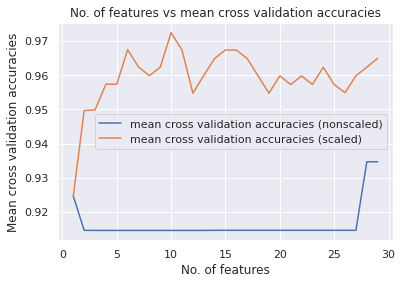

In [57]:
Feature_del=list(range(1,len(dataset.feature_names)))
Feature_del.reverse()
plt.plot(Feature_del,max_cv_acc,label="mean cross validation accuracies (nonscaled)")
plt.plot(Feature_del,max_cv_acc_scaled,label="mean cross validation accuracies (scaled)")
plt.legend()
plt.xlabel("No. of features")
plt.ylabel("Mean cross validation accuracies")
plt.title("No. of features vs mean cross validation accuracies");
plt.show()

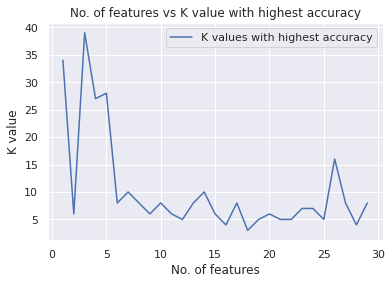

In [56]:
plt.plot(Feature_del,K_Value,label="K values with highest accuracy")
plt.legend()
plt.xlabel("No. of features")
plt.ylabel("K value")
plt.title("No. of features vs K value with highest accuracy");
plt.show()

## ***As we can observe from the above graph. The cross validation accuracy when we standardize the values provides us higher accuracy values when we compare it to other unstandardized dataset. The standarization also helps the model in whole perform better than the unstandardized data.***

In [59]:
print(f"The number of features that are important are {30-(max_cv_acc_scaled.index(max(max_cv_acc_scaled))+1)}, which are {Important_Features}")
print(f"The K value for the highest validation accuracy is {K_Value[max_cv_acc_scaled.index(max(max_cv_acc_scaled))]}")

The number of features that are important are 10, which are ['fractal dimension error', 'mean concave points', 'worst fractal dimension', 'mean symmetry', 'worst texture', 'worst symmetry', 'area error', 'worst concavity', 'worst area', 'worst concave points']
The K value for the highest validation accuracy is 8


## Part 5: Decision Tree Classifier [1.5 Mark]

Train a decision tree classifier on the standardized dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and check the example there.) Tune the `max_depth` and `min_samples_split` parameters of the tree using cross-validation (CV).
 * Compare the decision tree's performance (mean CV score) with KNN, both using all the features. 


In [60]:
from sklearn.tree import DecisionTreeClassifier

scaler=StandardScaler()
scaler.fit(X_Train)

X_Train_Scaled=scaler.transform(X_Train)
X_Test_Scaled=scaler.transform(X_Test)

# Here we train our data using the Desicion Tree Classifier model and compare it to the KNN classifier model and see which model provides the highes validation accuracy.
cross_validation_accuracy_DT=[]
for MAX_DEPTH in range(1,15):
  for MIN_SAMPLE_SPLIT in range(2,15):
    DTC = DecisionTreeClassifier(max_depth=MAX_DEPTH,min_samples_split=MIN_SAMPLE_SPLIT,random_state=0)
    score_DT=cross_validate(DTC,X_Train_Scaled,Y_Train,cv=5,return_train_score=True)
    cross_validation_accuracy_DT.append(score_DT['test_score'].mean())

print("The max accuracy achieved for Decision Tree Classifier is ",max(cross_validation_accuracy_DT))

cross_validation_accuracy_KNN=[]
for knn_value in range(1,101):
  knn=neighbors.KNeighborsClassifier(n_neighbors=knn_value)
  score_K=cross_validate(knn,X_Train_Scaled,Y_Train,cv=5,return_train_score=True)
  cross_validation_accuracy_KNN.append(score_K['test_score'].mean())

print("The max accuracy achieved for K nearest neighbour is ",max(cross_validation_accuracy_KNN))
print("The K value to achieve the value is",cross_validation_accuracy_KNN.index(max(cross_validation_accuracy_KNN))+1)

The max accuracy achieved for Decision Tree Classifier is  0.9321518987341773
The max accuracy achieved for K nearest neighbour is  0.9674367088607594
The K value to achieve the value is 10


## ***The KNN mean cross validation accuracy value is higher than Decision Tree mean cross validation accuracy value. Hence we choose KNN model.***

## Part 6: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results.

In [61]:
from sklearn.metrics import accuracy_score

#Once we have chosen a model which provides good validation accuracy for our training set, we now use that model to perdict out standardised test set.
knn=neighbors.KNeighborsClassifier(n_neighbors=cross_validation_accuracy_KNN.index(max(cross_validation_accuracy_KNN))+1)
knn.fit(X_Train_Scaled,Y_Train)
Result=knn.predict(X_Test_Scaled)
accuracy=accuracy_score(Y_Test,Result)
print("The accuracy is",round(accuracy*100,3),"%")

The accuracy is 95.906 %


## ***As we can observe throughout this assigment. We have used 2 different models and check out how standardisation can make a change to the accuracy of the models. We also see how reducing the least important features make a difference when we are training the model to take desicions.***
## ***For the final stage of the assignment when we are testing our model with the test data we use the model that has the best outcome, in our case its the K-Nearest Neighbour model that provides us with the best train accuracy.Hence we use this particular model to predict our test data. The accuracy we receive is greater than the accuracy we got for our unstandardised train data that was run using K-Nearest Neighbour model.***

References:

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/